# Decision Tree in Machine Learning

A decision tree is a supervised learning algorithm used for both classification and regression tasks. It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes. It works like a flowchart help to make decisions step by step where:

* Internal nodes represent attribute tests
* Branches represent attribute values
* Leaf nodes represent final decisions or predictions.

Decision trees are widely used due to their interpretability, flexibility and low preprocessing needs.

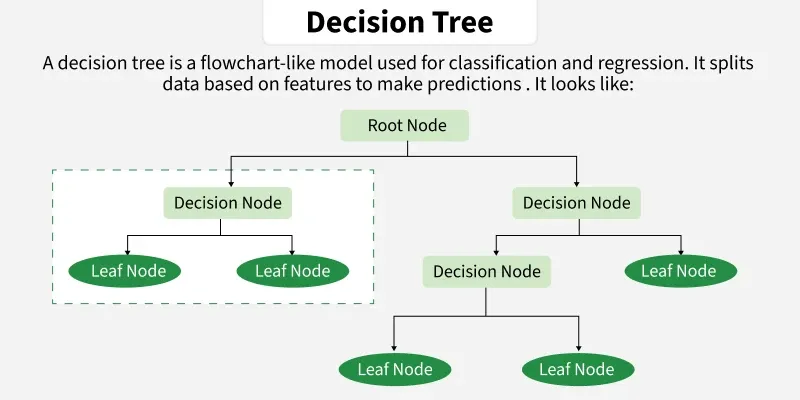

## How Does a Decision Tree Work

A decision tree splits the dataset based on feature values to create pure subsets ideally all items in a group belong to the same class. Each leaf node of the tree corresponds to a class label and the internal nodes are feature-based decision points. 

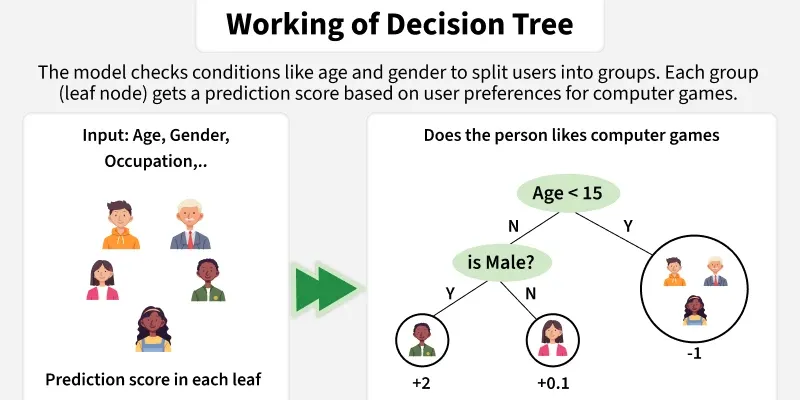

Let’s understand this with an example.

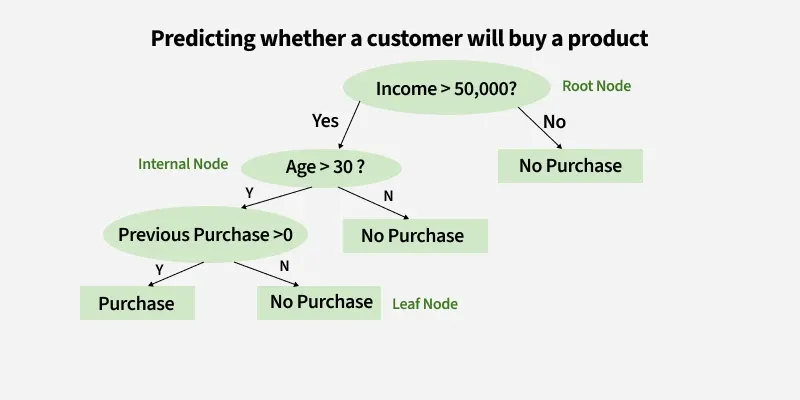

Let’s consider a decision tree for predicting whether a customer will buy a product based on age, income and previous purchases: Here's how the decision tree works:

#### 1. Root Node (Income)

First Question: "Is the person’s income greater than $50,000?"

* If Yes, proceed to the next question.
* If No, predict "No Purchase" (leaf node).
1
#### 2. Internal Node (Age):

If the person’s income is greater than $50,000, ask: "Is the person’s age above 30?"

* If Yes, proceed to the next question.
* If No, predict "No Purchase" (leaf node).

#### 3. Internal Node (Previous Purchases):

* If the person is above 30 and has made previous purchases, predict "Purchase" (leaf node).
* If the person is above 30 and has not made previous purchases, predict "No Purchase" (leaf node).

